This notebook evaluates the collision dynamics of tRNAs and ribosomes in a polydisperse setting at biologically-accurate crowding levels at 1) different time scales and 2) total simulation volume

In [3]:
from src import analysis_utils as utils
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline 
%load_ext autoreload
%autoreload

In [9]:
df=utils.readSimData("data/expt5_47tRNAEfTu_1ribosome_0tRNASynth_0aa_1000nmSidelength_20180424.xls")

<B>I. Visualization of how many times two tRNAs collide with different ribosomes over time (0s to 100ms) </B>

Using data from <B>Experiment 10</B>: 47 tRNAEFTu, 7 ribosomes, 8 tRNAsynth, 863 aa, 85nm side (phi=~0.22).

[[ 453.  680.  565.]
 [ 471.  436.  477.]
 [ 484.  611.  708.]
 [ 531.  610.  405.]
 [ 511.  394.  340.]
 [ 509.  495.  525.]
 [ 396.  447.  440.]]
[[ 1139.  1239.  1076.]
 [  919.  1037.  1036.]
 [  832.  1060.  1153.]
 [ 1105.  1155.   963.]
 [  991.   963.   883.]
 [  793.   864.   887.]
 [  843.  1051.  1102.]]
[[ 1635.  1806.  1616.]
 [ 1497.  1484.  1598.]
 [ 1263.  1481.  1547.]
 [ 1547.  1686.  1555.]
 [ 1587.  1690.  1495.]
 [ 1124.  1288.  1373.]
 [ 1376.  1689.  1666.]]
[[ 2191.  2341.  2160.]
 [ 1923.  1961.  1973.]
 [ 1625.  1952.  2080.]
 [ 1925.  2143.  1897.]
 [ 2109.  2202.  2008.]
 [ 1643.  1711.  1734.]
 [ 1969.  2280.  2345.]]
[[ 2797.  2841.  2733.]
 [ 2382.  2427.  2485.]
 [ 2166.  2610.  2672.]
 [ 2303.  2694.  2330.]
 [ 2597.  2761.  2577.]
 [ 2073.  2285.  2247.]
 [ 2507.  2843.  2901.]]
[[ 3427.  3440.  3265.]
 [ 2904.  2884.  3063.]
 [ 2645.  3053.  2967.]
 [ 2756.  3072.  2777.]
 [ 2968.  3245.  3060.]
 [ 2658.  2945.  2713.]
 [ 3187.  3334.  3390.]]
[[ 3953

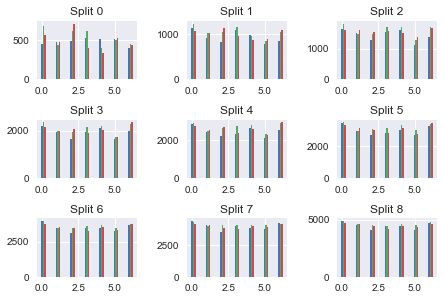

In [74]:
#### Mock up of time grid visualization ####

timesplitdf=utils.timeSplitter(df)

row_max=3
col_max=3
fig, ax = plt.subplots(row_max,col_max)

for j in range(row_max):
    for k in range(col_max):
        tRNACollisionCount_rt = utils.countRibosomeCollisions(pd.concat(timesplitdf[0:col_max*j+k+1]), np.arange(1,4),np.arange(48,55))
        #Could make 5x more efficient by summing the 2D array outputs instead of concat the original dfs.But couldn't do this for distribution
        #analysis where things are lists instead of nice clean 2D vectors.[though Could iterate through both lists, adding as we go to make new list]
        for i in range(3):
            ax[j,k].bar(.1*i+np.arange(0,7),tRNACollisionCount_rt[:,i], width=0.1, label="tRNA "+str(i))
        ax[j,k].set_title("Split "+str(col_max*j+k))

plt.tight_layout(pad=0.1, w_pad=2, h_pad=1)

#ax[j,k].set_title("# times ribosome sampled by a given tRNA")
#ax[j,k].set_xlabel("Ribosome ID #")
#ax[j,k].set_xticklabels(["0","r0","r1","r2","r3","r4","r5","r6"])
#ax[j,k].set_ylabel("# collision events")

##not summed up. As a secondary graph, maybe I can show 2 line on line graph over more fine grained accumulation of hits for a single/2 ribosomes.
#To show 1 high 1 low and then over time they become more even or something. Can get this probably from just plotting a sorted df, df sort by
#ribosome&tRNA and then plotting all tRNA hit time points.

<B>II. Line graph of how three (or all) tRNAs sample a single ribosome over time </B>
Have zoom ins at different time scales (or use log scale). We know at SOME time scale it won't just look like a y=x plot.

Using data from <B>Experiment 10</B>: 47 tRNAEFTu, 7 ribosomes, 8 tRNAsynth, 863 aa, 85nm side (phi=~0.22). Compare with negative control (expt 14) and semi-positive control (expt13); true positive control is just glass-like with ribosomes interacting with immediate neighbors

In [5]:
#timesplitdf=utils.timeSplitter(df)


NameError: name 'df' is not defined

<B>III. Line graph of how many incorrect tRNAs samples there are for 3 (or all) tRNAs with a single ribosome over time </B>. This should complement
(II); in a time where we see increased collisions, we should also see smaller numbers on incorrect collisions.As in (II) show at different time scales

Using data from <B>Experiment 10</B>: 47 tRNAEFTu, 7 ribosomes, 8 tRNAsynth, 863 aa, 85nm side (phi=~0.22).

In [10]:
dfS=df.sort_values(['reactantB','time'], ascending=[True,True])

#pseudocode: first, for a single ribosome do df_r=df.loc[df['reactantB']==ribosomeID], 
#then do df_t = df_r.loc[df_r['reactantA']==tRNAID]; now we have a df of 1 tRNA for 1 ribosome;
#then sort this df by time, and then plot the df x=time y=#of reactions (so should be monotonic)
#Can then scale this code to work for different subsets of time (1ms, 10ms, 100ms).




,time,rxn,x,y,z,reactantA,reactantB,productA,productB
8,5.400000e-07,rxn2,0.057905,0.080903,0.055477,29,48,29,48
9,5.700000e-07,rxn2,0.057842,0.080897,0.055530,29,48,29,48
13,6.800000e-07,rxn2,0.057756,0.080934,0.055474,29,48,29,48
18,8.500000e-07,rxn2,0.057730,0.081013,0.055442,29,48,29,48
48,2.310000e-06,rxn2,0.057494,0.081326,0.055018,41,48,41,48
169,9.940000e-06,rxn2,0.057185,0.080568,0.055534,13,48,13,48
218,1.341000e-05,rxn2,0.057277,0.080802,0.056134,18,48,18,48
226,1.368000e-05,rxn2,0.057208,0.080631,0.056331,18,48,18,48
228,1.379000e-05,rxn2,0.056966,0.080526,0.056296,18,48,18,48
230,1.380000e-05,rxn2,0.056959,0.080496,0.056318,18,48,18,48


<B>IV. Demonstrate the effect of volume on changing time scales of tRNA interaction with certain ribosomes </B>. This would show that if ribosomes in a certain area were looking for certain tRNAs, that at some timescale, the tRNAs might become trapped in that area.

<B>Experiment 15</B>: 8x volume and 8x particles with sidelength twice as much. 376 tRNAEFTu, 56 ribosomes, 64 tRNAsynth, 6041 aa, 170nm side (phi=~0.22).

Citations:
1. Check model excel sheet for numbers.
2. Show citation for crowding percentage being biologically accurate/what's in a cell